In [98]:
import tensorflow as tf
import pathlib
import random
import os
import IPython.display as display
import matplotlib.pyplot as plt
import time

In [99]:
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos',
                                         untar=True)

In [100]:
# 获取数据路径
data_root = pathlib.Path(data_root_orig)
print(data_root)

/home/kdd/.keras/datasets/flower_photos


In [101]:
for iterm in data_root.iterdir():
    print(iterm)

/home/kdd/.keras/datasets/flower_photos/tulips
/home/kdd/.keras/datasets/flower_photos/sunflowers
/home/kdd/.keras/datasets/flower_photos/dandelion
/home/kdd/.keras/datasets/flower_photos/daisy
/home/kdd/.keras/datasets/flower_photos/roses
/home/kdd/.keras/datasets/flower_photos/LICENSE.txt


In [102]:
all_images_path = list(data_root.glob('*/*'))
all_images_path = [str(path) for path in all_images_path]
random.shuffle(all_images_path)

In [103]:
all_images_path[0]

'/home/kdd/.keras/datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'

In [105]:
type((data_root/'LICENSE.txt'))

pathlib.PosixPath

In [106]:
attrbutions = (data_root/'LICENSE.txt').open(encoding='utf-8').readlines()[4:]

In [107]:
attrbutions = [line.split(' CC-BY') for line in attrbutions]

In [108]:
attrbutions = dict(attrbutions)

In [109]:
pathlib.Path(all_images_path[0])

PosixPath('/home/kdd/.keras/datasets/flower_photos/roses/6158504080_b844a9ae05.jpg')

In [110]:
pathlib.Path(all_images_path[0]).relative_to(data_root)

PosixPath('roses/6158504080_b844a9ae05.jpg')

In [111]:
str(pathlib.Path(all_images_path[0]).relative_to(data_root))

'roses/6158504080_b844a9ae05.jpg'

In [112]:
attrbutions[str(pathlib.Path(all_images_path[0]).relative_to(data_root))]

' by Randi Hausken - https://www.flickr.com/photos/randihausken/6158504080/\n'

In [113]:
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + ' - '.join(attrbutions[str(image_rel)].split(' - ')[:-1])

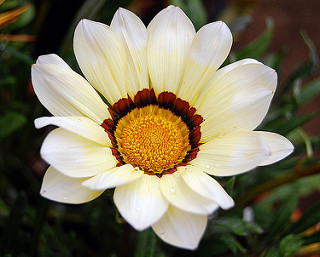

Image (CC BY 2.0) by Sam Berry



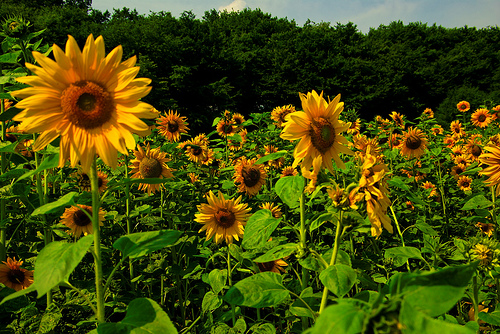

Image (CC BY 2.0) by Stephanie Kroos



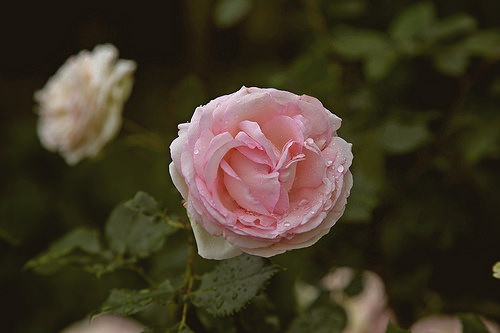

Image (CC BY 2.0) by Annabelle LovLoree



In [114]:
for n in range(3):
    image_path = random.choice(all_images_path)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [116]:
caption_image(all_images_path[0])

'Image (CC BY 2.0) by Randi Hausken'

In [118]:
attrbutions[str(pathlib.Path(all_images_path[0]).relative_to(data_root))].split(' - ')[:-1]

[' by Randi Hausken']

In [119]:
for i in data_root.glob('*/'):
    if i.is_dir():
        print(i.name)

tulips
sunflowers
dandelion
daisy
roses


In [120]:
label_names = sorted([item.name for item in data_root.glob('*/') if item.is_dir()])
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [121]:
label_to_index = dict((label, index) for index, label in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [122]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_images_path]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [2, 3, 1, 0, 4, 2, 4, 0, 4, 1]


In [124]:
img_path = all_images_path[0]
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+'......')

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x......


In [125]:
img_tensor = tf.image.decode_jpeg(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(333, 500, 3)
<dtype: 'uint8'>


In [126]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.9776785


In [127]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192,192])
    image /= 255.0
    return image

In [128]:
def load_and_preprocess(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

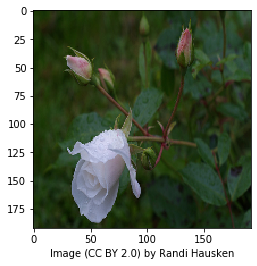

In [130]:
image_path =all_images_path[0]
label = all_image_labels[0]
plt.imshow(load_and_preprocess(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
print()

In [131]:
all_images_path[0]

'/home/kdd/.keras/datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'

In [132]:
path_ds = tf.data.Dataset.from_tensor_slices(all_images_path)

In [133]:
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [136]:
image_ds = path_ds.map(load_and_preprocess)

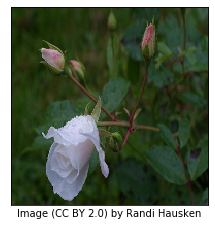

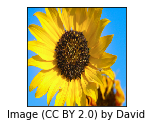

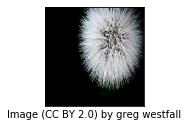

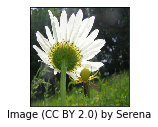

In [137]:
plt.figure(figsize=(8,8))
for i, image in enumerate(image_ds.take(4)):
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_images_path[i]))
    plt.show()

In [138]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [139]:
label_ds

<TensorSliceDataset shapes: (), types: tf.int64>

In [141]:
for label in label_ds.take(4):
    print(label_names[label.numpy()])

roses
sunflowers
dandelion
daisy


In [142]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
image_label_ds

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>

In [143]:
all_image_labels[0]

2

In [144]:
ds = tf.data.Dataset.from_tensor_slices((all_images_path, all_image_labels))

In [145]:
ds

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [146]:
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess(path), label

In [147]:
image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [150]:
BATCH_SZIE = 32
ds = image_label_ds.shuffle(buffer_size=len(all_images_path))
ds = ds.repeat()
ds = ds.batch(BATCH_SZIE)
ds = ds.prefetch(5*BATCH_SZIE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [151]:
ds = image_label_ds.apply(tf.data.experimental.shuffle_and_repeat(buffer_size=len(all_images_path)))
ds = ds.batch(BATCH_SZIE)
ds = ds.prefetch(buffer_size=5*BATCH_SZIE)
ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [ ]:
help(keras_applications.mobilenet_v2.preprocess_input)

In [153]:
steps_per_epoch = tf.math.ceil(len(all_images_path)/BATCH_SZIE).numpy()

In [154]:
steps_per_epoch

115.0

In [155]:
default_timeit_steps = 2*steps_per_epoch + 1

In [156]:
def timeit(ds, steps=default_timeit_steps):
    '''测试数据获取性能'''
    overall_start=time.time()
    # 在开始计时之前取单个batch填充Pipline
    it = iter(ds.take(steps+1))
    next(it)
    
    start = time.time()
    for i, (images, labels) in enumerate(it):
        if i%10 == 0:
            print('.', end='')
    print()
    end = time.time()
    
    duration = end - start
    print('{} batches: {} s'.format(steps, duration))
    print('{:0.5f} Images/s'.format(BATCH_SZIE*steps/duration))
    print('Total time: {}s'.format(end-overall_start))

In [157]:
ds = image_label_ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)

In [158]:
timeit(ds)

........................
231.0 batches: 8.974538087844849 s
823.66356 Images/s
Total time: 13.648120880126953s


# 利用缓存

In [160]:

ds = image_label_ds.cache()
ds = ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [161]:
timeit(ds)

........................
231.0 batches: 0.3771364688873291 s
19600.33200 Images/s
Total time: 4.634130477905273s


In [ ]:
# 利用缓存文件
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
timeit(ds)

# 图片写入tfrecord

In [163]:
images_ds = tf.data.Dataset.from_tensor_slices(all_images_path).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(images_ds)

In [164]:
images_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [165]:
ds = tf.data.Dataset.zip((images_ds, label_ds))
ds = ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [166]:
timeit(ds)

........................
231.0 batches: 8.828890085220337 s
837.25133 Images/s
Total time: 13.392988204956055s


# 序列化后写入tfrecord

In [167]:
path_ds = tf.data.Dataset.from_tensor_slices(all_images_path)
image_ds = path_ds.map(load_and_preprocess)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [168]:
ds = image_ds.map(tf.io.serialize_tensor) # 序列化
ds

<MapDataset shapes: (), types: tf.string>

In [169]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec') # 写入tfrecord
tfrec.write(ds)

In [171]:
ds = tf.data.TFRecordDataset('images.tfrec') # 从tfrecord读取数据集

In [172]:
def parse(x):
    result = tf.io.parse_tensor(x, out_type=tf.float32)
    result = tf.reshape(result, [192, 192, 3])
    return result

ds = ds.map(parse, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [173]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [174]:
timeit(ds)

........................
231.0 batches: 1.227954387664795 s
6019.76757 Images/s
Total time: 1.6946399211883545s


# 最新图像数据加载教程

In [3]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

In [4]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                   fname='flower_photos', untar=True)

In [5]:
data_dir

'/home/kdd/.keras/datasets/flower_photos'

In [6]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/home/kdd/.keras/datasets/flower_photos')

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [13]:
# 查看data_dir下的文件
for i in data_dir.glob('*'):
    print(i)

/home/kdd/.keras/datasets/flower_photos/tulips
/home/kdd/.keras/datasets/flower_photos/sunflowers
/home/kdd/.keras/datasets/flower_photos/dandelion
/home/kdd/.keras/datasets/flower_photos/daisy
/home/kdd/.keras/datasets/flower_photos/roses
/home/kdd/.keras/datasets/flower_photos/LICENSE.txt


In [14]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.is_dir()])
CLASS_NAMES

array(['tulips', 'sunflowers', 'dandelion', 'daisy', 'roses'],
      dtype='<U10')

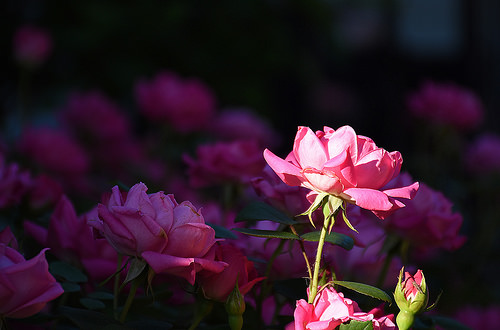

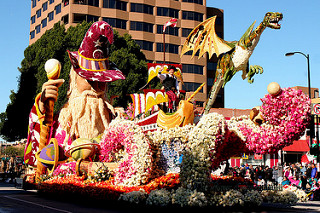

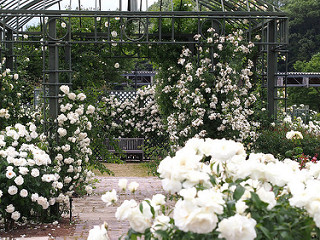

In [15]:
roses = list(data_dir.glob('roses/*'))
for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

# Load using keras.preprocessing

In [16]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [17]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [18]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    classes=list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


## Inspect a batch

In [27]:
from PIL import Image

In [28]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(25):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [48]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

# Loading using tf.data

In [30]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [32]:
for p in list_ds.take(5):
    print(p.numpy())

b'/home/kdd/.keras/datasets/flower_photos/sunflowers/20171662239_f69b6c12bd_n.jpg'
b'/home/kdd/.keras/datasets/flower_photos/dandelion/2477986396_19da36d557_m.jpg'
b'/home/kdd/.keras/datasets/flower_photos/tulips/16862349256_0a1f91ab53.jpg'
b'/home/kdd/.keras/datasets/flower_photos/roses/14414123198_24606fb32d.jpg'
b'/home/kdd/.keras/datasets/flower_photos/dandelion/5749815755_12f9214649_n.jpg'


In [33]:
list(list_ds)[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'/home/kdd/.keras/datasets/flower_photos/dandelion/5909154147_9da14d1730_n.jpg'>

In [34]:
os.path.sep

'/'

In [35]:
tf.strings.split(b'/home/kdd/.keras/datasets/flower_photos/dandelion/5909154147_9da14d1730_n.jpg', os.path.sep)

<tf.Tensor: shape=(8,), dtype=string, numpy=
array([b'', b'home', b'kdd', b'.keras', b'datasets', b'flower_photos',
       b'dandelion', b'5909154147_9da14d1730_n.jpg'], dtype=object)>

In [36]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == CLASS_NAMES

In [41]:
def decode_img(img):
    # 解析图片为三维uint8的张量
    img = tf.image.decode_jpeg(img, channels=3)
    # 转为[0,1]中的float类型
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 重新定义图片大小
    return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [42]:
def process_path(file_path):
    label = get_label(file_path)
    # 从文件路径加载图片源数据
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [43]:
labeled_ds = list_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [44]:
for image, label in labeled_ds.take(1):
    print('Image shape: ', image.numpy().shape)
    print('Label: ', label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False False  True]


In [45]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    """此数据集小，只需一次就能全部加载到内存。当数据集过大不适合全部加载至内存时， 使用.cache(filename)缓存"""
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

In [46]:
train_ds = prepare_for_training(labeled_ds)
image_batch, label_batch = next(iter(train_ds))

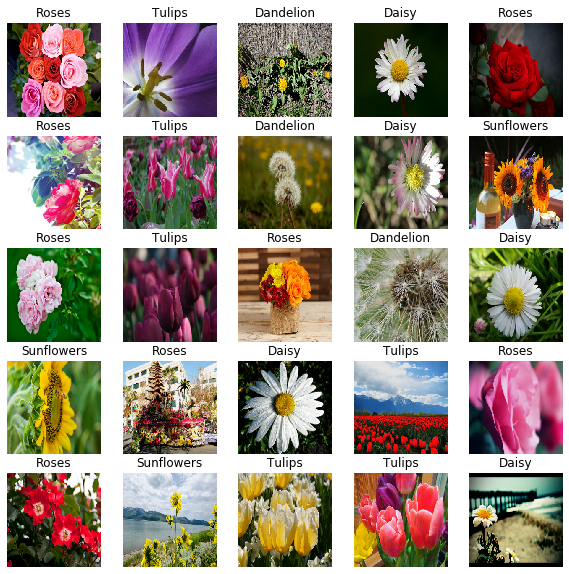

In [47]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [49]:
import time
default_timeit_steps = 1000

In [50]:
def timeit(ds, steps=default_timeit_steps):
    '''检验数据集性能'''
    start = time.time()
    it = iter(ds)
    for i in range(steps):
        batch = next(it)
        if i%10 == 0:
            print('.', end='')
    print()
    end = time.time()
    duration = end - start
    print('{} batches: {} s'.format(steps, duration))
    print('{:0.5f} Images/s'.format(BATCH_SIZE*steps/duration))

In [51]:
timeit(train_data_gen)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [53]:
timeit(train_ds)

....................................................................................................
1000 batches: 5.093862056732178 s
6282.07039 Images/s


In [54]:
uncached_ds = prepare_for_training(labeled_ds, cache=False)
timeit(uncached_ds)

....................................................................................................
1000 batches: 26.659152269363403 s
1200.33824 Images/s


In [ ]:
filecache_ds = prepare_for_training(labeled_ds, cache="./flowers.tfcache")
timeit(filecache_ds)